In [4]:
import cv2
import tqdm
import os
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import load_img
from keras.utils import to_categorical
import sklearn

In [5]:
TRAIN_DIR='images/train'
TEST_DIR='images/test'

In [6]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return image_paths,labels

In [7]:
train = pd.DataFrame()
train['image'] , train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [9]:
test = pd.DataFrame()
test['image'] , test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [10]:
print(test)

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [11]:
from tqdm.notebook import tqdm
from keras.preprocessing.image import load_img
from tqdm import tqdm

In [12]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [13]:
train_features = extract_features(train['image'])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28821/28821 [00:32<00:00, 882.42it/s]


In [14]:
test_features = extract_features(test['image'])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7066/7066 [00:08<00:00, 871.29it/s]


In [15]:
x_train=train_features/255.0
x_test=test_features/255.0

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [18]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [19]:
y_train = to_categorical(y_train,num_classes=7)
y_test = to_categorical(y_test,num_classes=7)

In [20]:
from keras.models import Sequential

In [22]:
model = Sequential()

model.add(Conv2D(128, (3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0,4))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0,4))

model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0,4))

model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0,4))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

#output layer
model.add(Dense(7, activation='softmax'))

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
model.fit(x=x_train,y=y_train,batch_size=128,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 205s 900ms/step - accuracy: 0.2543 - loss: 1.7946 - val_accuracy: 0.3721 - val_loss: 1.5953
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 192s 848ms/step - accuracy: 0.3950 - loss: 1.5324 - val_accuracy: 0.4867 - val_loss: 1.3312
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 184s 814ms/step - accuracy: 0.4895 - loss: 1.3181 - val_accuracy: 0.5280 - val_loss: 1.2395
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 3484s 15s/step - accuracy: 0.5388 - loss: 1.2052 - val_accuracy: 0.5375 - val_loss: 1.2205
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 186s 822ms/step - accuracy: 0.5777 - loss: 1.1047 - val_accuracy: 0.5466 - val_loss: 1.2008
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 179s 790ms/step - accuracy: 0.6151 - loss: 1.0121 - val_accuracy: 0.5531 - val_loss: 1.1929
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 183s 809ms/step - accuracy: 0.6538 - loss: 0.9203 - val_accuracy: 0.5626 - val_loss: 1.2229
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 175s 774ms/step - accuracy: 0

KeyboardInterrupt: 

In [37]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.keras")

In [38]:
label=['angry','disgust','fear','happy','neutral','sad','surprise'] 

In [39]:
from keras.utils import load_img, img_to_array
import numpy as np
from keras.preprocessing.image import load_img

In [40]:
def ef(image):
    img = load_img(image, color_mode='grayscale', target_size=(48, 48))
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

In [41]:
# Prediction
image = 'images/train/angry/27.jpg'
print('Original image is of angry')
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print('Model prediction is', pred_label)

Original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Model prediction is angry


In [42]:
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

Original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Model prediction is angry


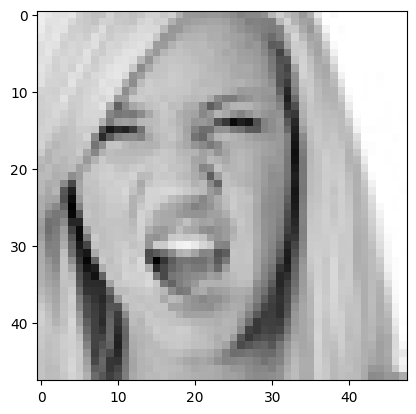

In [44]:
image = 'images/train/angry/27.jpg'
print('Original image is of angry')
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print('Model prediction is', pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')

Original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Model prediction is happy


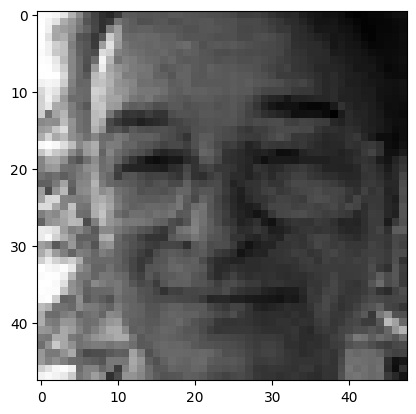

In [45]:
image = 'images/train/happy/24.jpg'
print('Original image is of happy')
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print('Model prediction is', pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')